# Chapter 19: Advanced Durations (Complex and Tuplets)

In [1]:
from music21 import *

We’ll recall that one thing that all *Music21Objects* have a *Duration* object

In [2]:
n = note.Note('C#4')
n.duration

<music21.duration.Duration 1.0>

In [3]:
d = duration.Duration(4.0)
d

<music21.duration.Duration 4.0>

In [4]:
d = duration.Duration(1.5)
(d.type, d.dots, d.quarterLength)

('quarter', 1, 1.5)

The standard *type* values range from tiny 2048th notes up through the immense duplex-maxima

In [5]:
startType = '2048th'
try:
    while True:
        print(startType, end=", ")
        startType = duration.nextLargerType(startType)
except duration.DurationException:
    pass

2048th, 1024th, 512th, 256th, 128th, 64th, 32nd, 16th, eighth, quarter, half, whole, breve, longa, maxima, duplex-maxima, 

## Tuplets

Tuplets, such as triplets(三连音), can be set by giving a fraction or close approximation to a fraction as a quarter length

In [6]:
d = duration.Duration(0.3333333333333)
d

<music21.duration.Duration 1/3>

In [7]:
# The quarterLength of a duration will be expresssed as a fractions.Fraction class
d.quarterLength

Fraction(1, 3)

In [8]:
float(d.quarterLength)

0.3333333333333333

In [9]:
d.fullName

'Eighth Triplet (1/3 QL)'

*.tuplets* propery store the information about the triplet

In [10]:
d.tuplets

(<music21.duration.Tuplet 3/2/eighth>,)

Tuplets have a *.type* which is usually None

In [11]:
trip = duration.Tuplet(3, 2)
trip.type is None

True

If we wanted “3:2” then we’d set “trip.tupletNormalShow” to “number”

In [12]:
n = note.Note()
n.duration = duration.Duration(2.0/3.0)
n.duration.tuplets[0].tupletNormalShow = 'number'
s = stream.Stream()
s.repeatAppend(n, 3)
s.insert(0, meter.TimeSignature('2/4'))
s.show('xml')

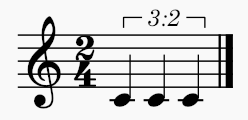

To add a tuplet to an existing duration, use the *.appendTuplet(t)* method

In [13]:
t = duration.Tuplet(5, 4)
t.setDurationType('16th')
d = duration.Duration('16th')
d.appendTuplet(t)
n = note.Note('E-4')
n.duration = d
s = stream.Stream()
s.repeatAppend(n, 20)
s.show('xml')

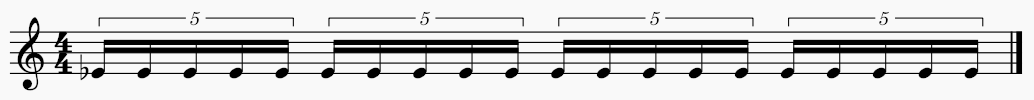

In [14]:
# Once a Tuplet is appended to a Duration, it becomes “frozen”(can not be changed)
t.frozen

True

The effect of any set of tuplets on the overall duration of a note can be found

In [15]:
d = duration.Duration('half')
d.appendTuplet(duration.Tuplet(3, 2))
d.appendTuplet(duration.Tuplet(7, 5))
d.aggregateTupletMultiplier()

Fraction(10, 21)

## Unlinking Durations

Each Duration object has four essential pieces of information, the *type*, the number of *dots*, zero or more tuplets, and *.quarterLength*

In [17]:
d = duration.Duration(3.0)
(d.type, d.dots, d.tuplets, d.quarterLength)

('half', 1, (), 3.0)

In [18]:
# changing one of these pieces of information changes the one or more of the others
d.quarterLength *= 4/5
(d.type, d.dots, d.tuplets, d.quarterLength)

('half', 1, (<music21.duration.Tuplet 5/4/half>,), Fraction(12, 5))

In [19]:
d.type = '16th'
d.dots = 2
(d.type, d.dots, d.tuplets, d.quarterLength)

('16th', 2, (<music21.duration.Tuplet 5/4/half>,), Fraction(7, 20))

However, there are times when we might want to **separate** one piece of information separate from another

In [20]:
d = duration.Duration()
d.type = 'half'
d.dots = 1
(d.type, d.dots, d.quarterLength)

('half', 1, 3.0)

setting *Duration.linked* to False

In [21]:
d.linked

True

In [22]:
d.linked = False
d.quarterLength = 11/4
(d.type, d.dots, d.quarterLength)

('half', 1, 2.75)

## Durations that take no time at all

 It’s used for measuring the conceptual length of grace notes(装饰音), spaceless objects like *Clefs*, Liz Taylor’s marriages(just a joke, she married eight times)

In [23]:
k = key.KeySignature(3)
k.duration

<music21.duration.Duration 0.0>

In [24]:
k.duration.type

'zero'

## Complex Durations

Complex *Durations* are those that can’t be expressed easily as a single written *Note* on a page

In [25]:
# a Note lasting a half-note plus a sixteenth-note can’t be written as a single Note graphic
# but it’s perfectly fine to use as a quarterLength
oddDuration = duration.Duration()
oddDuration.quarterLength = 2.25

In [26]:
oddDuration.type

'complex'

Complex types have multiple “DurationTuple” objects that represent simple durations 

In [27]:
oddDuration.components

(DurationTuple(type='half', dots=0, quarterLength=2.0),
 DurationTuple(type='16th', dots=0, quarterLength=0.25))

## Splitting and Tied objects

In [30]:
d = duration.Duration(5.0)
d.type

'complex'

In [32]:
n = note.Note('F#4')
n.duration = d
n.show('xml')

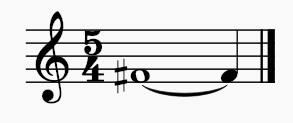

Now let’s split this Note according to its component durations

In [33]:
split = n.splitAtDurations()
split

(<music21.note.Note F#>, <music21.note.Note F#>)

In [34]:
[subNote.quarterLength for subNote in split]

[4.0, 1.0]

So now instead of one note with the duration of 5.0 quarter notes, we have two notes

In [35]:
s = stream.Stream()
s.append(split)
s.show('xml')
# the Stream was allowed to split the notes into two measures in order to use the more common time signature of 4/4

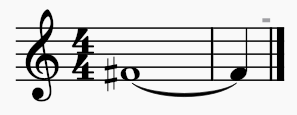

how does the Stream know that the two notes should have a tie connecting them?

In [37]:
# check the .tie attribute on each of the notes
split[0].tie

<music21.tie.Tie start>

In [38]:
split[1].tie

<music21.tie.Tie stop>